**Hyper parameter tuning**

- The parameters or arguments of model can change by user to get the good model performance

- Grid search

- Random search

- Assume that in Decsision tree we have following hyper parameter

    - criterion : {"gini", "entropy", "log_loss"}
        
    - splitter : {"best", "random"}
     
    - max depth : {1,2,3,4,5,6}
        
- By default we have criterion 'gini' is there

- But the model might be performed when criterion is 'entropy' also

- we need to test the combinations by providing different values

- To try the combinations we have two methods

    - Grid search:
        
        - it is a step by step by consider the all combinations
        
        - in criterion: 3,splitter: 2, max depth=6
                
        - The total combinations are : 3x2x6=36
            
    - Random search:
        
        - It will not do all 36 possibile combiantions
        
        - It will select randomly some combinations
        
- Generally we do Grid search 

- By doing this we have term called Cross validation


**Cross validation**:
    
- Cross validation: CV
    
- CV=4 means we devide data randomly into 4 parts

- Out of these 4 parts every time 3 parts consider as train data, 1 parts consider as test data

- P1  P2  P3  P4  are 4 parts of data

- Combination1:  P1 + P2 + P3 are train data  and P4 as test data
    
    - For Combination-1 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination1 will do all 36 

- Combination2:  P1 + P2 + P4   are train data  and   P3 as test data
    
    - For Combination-2 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination-2 will do all 36 

- Combination3:  P1 + P3 + P4  are train data and P2 as test data
    
    - For Combination-3 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination-3 will do all 36 

- Combination-4: P2 + P3 + P4  are train data and P1 as test data
    
    - For Combination-4 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination-4 will do all 36
    
- Finally will consider the average of all 4 combinations is the output

- Combination-1 has accuracy-1

- Combination-2 has accuracy-2

- Combination-3 has accuracy-3

- Combination-4 has accuracy-4

- Accuracy= avg(acc1+acc2+acc3+acc4)

$Step-1$

**Import the packages**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

$Step-2$:
    
**Read the data**

In [2]:
data=pd.read_csv("Preprocessed_data.csv")
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


$Step-3$

**Divide data into input and output**

In [3]:
# Here the target column is Customer Status
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

$Step-4$:
    
**Train test split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(3868, 30)
(967, 30)
(3868,)
(967,)


$Step-5$

**Read the base model**

In [5]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier()   # Base model
grid_tree

DecisionTreeClassifier()

$Step-6$

**Create the parameter file**

In [6]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**max_depth**:
    
    - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less        than  min_samples_split samples.
    
**min_samples_split**:
     
      - The minimum number of samples required to split an internal node:
      
**min_samples_leaf**:
    
       - The minimum number of samples required to be at a leaf node.

In [7]:
# You need to create dictonary with hyper parameters
param_grid = {
    "criterion":['gini','entropy'], # 2
    'max_depth': [3, 4, 5, 6, 7, 8], # 6
    'min_samples_split': [2, 3, 4],  # 3
    'min_samples_leaf': [1, 2, 3, 4], # 4
    'random_state': [0, 42] # 2
}

# 2*6*3*4*2=288

$Step-7$

**Apply Grid Search CV**

In [8]:
# now these parameters to apply in a DT model

grid_search = GridSearchCV(grid_tree,  # Base model
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                           verbose=True)

In [9]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [16]:
dir(grid_search)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'classes_',
 'cv',
 'decision_function',
 'error_score',
 'estimator',

$Step-8$

**Fit the data**

In [10]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
end=time.time()
print("Total time taken is:",(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Total time taken is: 66.37553453445435


In [21]:
dir(grid_search)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 '

$Step-9$:
    
**Get the best parameters**

In [11]:
grid_search.best_estimator_

# Estimator means model : 144 models

# best estimator is your model
# if you use this model 
# then we need to find all the metrics

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=0)

In [13]:
grid_search.best_score_

0.7911075008941972

In [12]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

**Cross Validation score**

In [ ]:
# Assume that we already know the best model
# best paramters with out doing Grid Search
# Now I want to apply Cross valiation
# In the cross validation every part involved in training and testing
# cross_val_score cv=5 by default

In [14]:
accuracy_list=cross_val_score(grid_search.best_estimator_,
                X_train,
                y_train,
                cv=5,
                scoring='accuracy')
accuracy_list

# It will give each part accuracy
# by using best model (best estimator)

array([0.80361757, 0.77648579, 0.78940568, 0.80595084, 0.78007762])

In [15]:
accuracy_list.mean()

0.7911075008941972

In [16]:
## All together

#================================ Step-1: Get the base model===========================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()   # Base model
DT_params=[keys for keys in grid_tree.get_params()]
print("avialable parameters for model:",DT_params)

print("==========================================================================================")

#================================ Step-2: Create a dictionary for params=================================
param_grid = {
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

print("Processing parameters are:",param_grid)

print("===============================================================================================")

#============================== Step-3: Apply the Grid serach======================================
grid_search = GridSearchCV(grid_tree,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

#============================= Step-4: fit the model with train data ===============================
grid_search.fit(X_train,y_train)

#============================= Step-5: Get the best parameters=====================================
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

avialable parameters for model: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']
Processing parameters are: {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'random_state': [0, 42]}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}
best train accuracy: 0.7911075008941972


**Identify the predictions and Metrics by using best parameters**

- Out of 1440 fittings, one best fit model is outcome

- Best fit means it will give the best parameters

- For me the best parameter combination is

    - entropy
    
    - depth=6
    
    - sample leaf=3
    
    - sampl split=2
    
    - random state=0
    
- Our goal is by using above parameter we need to find the predictions

- And will evaluate model performance

- For that Import Decision Tree and pass the best parameters

- Now fit that model with X_train, y_train

- Get the predictions by passing X_test

- Compare the predictions with y_test

- Calculate

    - Accuracy
    
    - Precision
    
    - Recall
    
    - F1 score
    
    - Roc-Auc curve

accuray is: 80.87
F1 is: 0.86
Precision is: 0.88
Recall is: 0.84
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       305
           1       0.88      0.84      0.86       662

    accuracy                           0.81       967
   macro avg       0.78      0.79      0.78       967
weighted avg       0.81      0.81      0.81       967



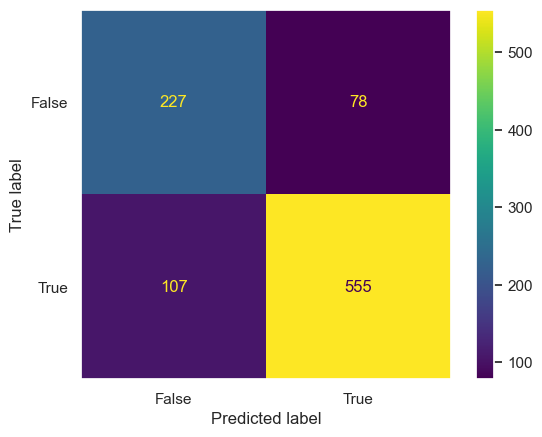

True negative: 227
False postive: 78
False negative: 107
True postive: 555


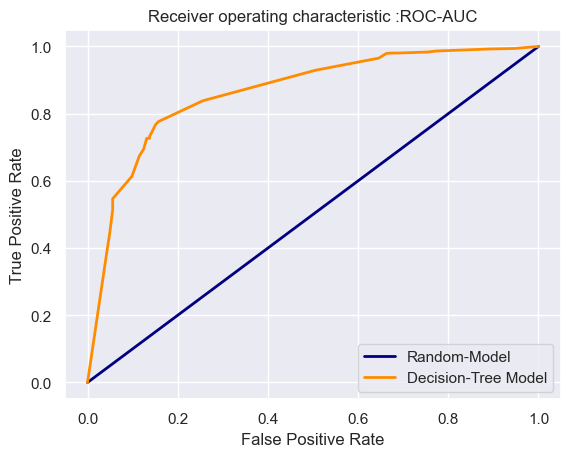

Computed Area Under the Curve (AUC) 0.863416868901986


In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',
                            max_depth=6,
                            min_samples_leaf=3,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_dt=dtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

# ================================Step-7:Confusion matrix=========================================================================

cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2, label="Decision-Tree Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic :ROC-AUC")
plt.legend()
plt.show()
print("Computed Area Under the Curve (AUC)",auc(fpr, tpr))

In [19]:
# Decision tree will provide imprtant features also
# Information gain values 
dtree.feature_importances_

array([0.        , 0.08769625, 0.03585805, 0.05987065, 0.01403895,
       0.01557506, 0.18863799, 0.04941705, 0.        , 0.        ,
       0.        , 0.03152153, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41715928, 0.        , 0.        , 0.06704056,
       0.00725393, 0.        , 0.        , 0.00875343, 0.01717728])

In [20]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

# This concept is valid only for DT
# you can use these features top 10 again develop the model
# Dont use these feature in another model

,Feature Name,Importance
21,Contract,0.417159
6,Number of Referrals,0.188638
1,Age,0.087696
24,Monthly Charge,0.067041
3,Number of Dependents,0.059871
7,Tenure in Months,0.049417
2,Married,0.035858
11,Internet Type,0.031522
29,Total Revenue,0.017177
5,Longitude,0.015575
